# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# You have to include the full link to the csv file containing your dataset
bike = pd.read_csv('bike-sharing_hourly.csv')

In [5]:
# Specify the path where you want to save the pickle file
original_bike_data = 'bike_sharing_original.pkl'

# Save the DataFrame as a pickle file
bike.to_pickle(original_bike_data)

In [3]:
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<AxesSubplot: >

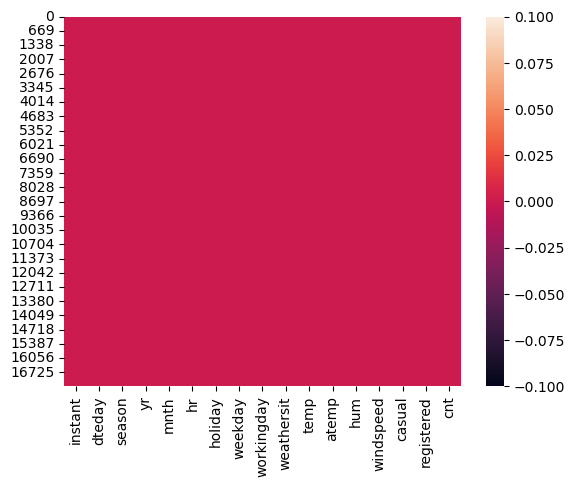

In [6]:
sns.heatmap(bike.isnull())

C:\Users\ecorr\AppData\Local\Temp\ipykernel_142012\623020887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike.corr(), annot = True)


<AxesSubplot: >

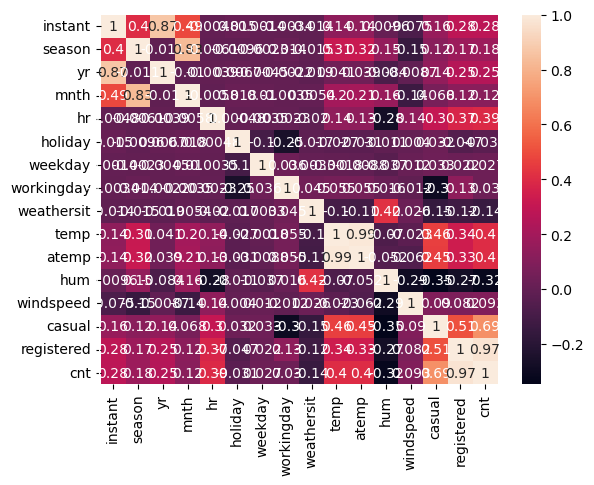

In [7]:
sns.heatmap(bike.corr(), annot = True)

In [8]:
from math import sin, cos, pi

# Function to create sine and cosine features for cyclic attributes
def encode_cyclic_feature(bike, col, max_val):
    bike[col + '_sin'] = bike[col].apply(lambda x: sin(x * (2. * pi / max_val)))
    bike[col + '_cos'] = bike[col].apply(lambda x: cos(x * (2. * pi / max_val)))
    return bike

# Encode 'hr', 'mnth', and 'weekday' as cyclic
bike_sharing_encoded = bike.copy()
bike_sharing_encoded = encode_cyclic_feature(bike_sharing_encoded, 'hr', 24)
bike_sharing_encoded = encode_cyclic_feature(bike_sharing_encoded, 'mnth', 12)
bike_sharing_encoded = encode_cyclic_feature(bike_sharing_encoded, 'weekday', 7)

# Drop the original columns
bike_sharing_encoded.drop(['hr', 'mnth', 'weekday'], axis=1, inplace=True)

# One-Hot Encoding for 'season' and 'weathersit'
#bike_sharing_encoded = pd.get_dummies(bike_sharing_encoded, columns=['season', 'weathersit'], drop_first=True)

# Drop redundant features
bike_sharing_encoded.drop(['instant', 'dteday', 'atemp', 'casual', 'registered', 'season', 'weathersit', 'yr'], axis=1, inplace=True)

# Show the updated DataFrame
bike_sharing_encoded.head()


,holiday,workingday,temp,hum,windspeed,cnt,hr_sin,hr_cos,mnth_sin,mnth_cos,weekday_sin,weekday_cos
0,0,0,0.24,0.81,0.0,16,0.000000,1.000000,0.5,0.866025,-0.781831,0.62349
1,0,0,0.22,0.80,0.0,40,0.258819,0.965926,0.5,0.866025,-0.781831,0.62349
2,0,0,0.22,0.80,0.0,32,0.500000,0.866025,0.5,0.866025,-0.781831,0.62349
3,0,0,0.24,0.75,0.0,13,0.707107,0.707107,0.5,0.866025,-0.781831,0.62349
4,0,0,0.24,0.75,0.0,1,0.866025,0.500000,0.5,0.866025,-0.781831,0.62349


In [9]:
bike_sharing_encoded

,holiday,workingday,temp,hum,windspeed,cnt,hr_sin,hr_cos,mnth_sin,mnth_cos,weekday_sin,weekday_cos
0,0,0,0.24,0.81,0.0000,16,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349
1,0,0,0.22,0.80,0.0000,40,0.258819,0.965926,5.000000e-01,0.866025,-0.781831,0.62349
2,0,0,0.22,0.80,0.0000,32,0.500000,0.866025,5.000000e-01,0.866025,-0.781831,0.62349
3,0,0,0.24,0.75,0.0000,13,0.707107,0.707107,5.000000e-01,0.866025,-0.781831,0.62349
4,0,0,0.24,0.75,0.0000,1,0.866025,0.500000,5.000000e-01,0.866025,-0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0,1,0.26,0.60,0.1642,119,-0.965926,0.258819,-2.449294e-16,1.000000,0.781831,0.62349
17375,0,1,0.26,0.60,0.1642,89,-0.866025,0.500000,-2.449294e-16,1.000000,0.781831,0.62349
17376,0,1,0.26,0.60,0.1642,90,-0.707107,0.707107,-2.449294e-16,1.000000,0.781831,0.62349
17377,0,1,0.26,0.56,0.1343,61,-0.500000,0.866025,-2.449294e-16,1.000000,0.781831,0.62349


In [10]:
bike_sharing_encoded.to_csv('bike_sharing_encoded_nodummy.csv', index=False)

In [11]:
# Specify the path where you want to save the pickle file
encoded_bike_data = 'bike_sharing_encoded.pkl'

# Save the DataFrame as a pickle file
bike_sharing_encoded.to_pickle(encoded_bike_data)

## PART II: Prediction Model

## Pycaret Model Comparison

In [12]:
# Import PyCaret's regression module
from pycaret.regression import *

# Initialize the setup
reg_setup = setup(data= bike_sharing_encoded, target='cnt', train_size = 0.7, session_id=123)

# Compare base models and select the best one
best = compare_models()

# Create the best model
model = create_model(best)

# Tune the model for better performance
tuned_model = tune_model(model)

# Finalize the model (trains on the entire dataset including the holdout set)
final_model = finalize_model(tuned_model)

# Evaluate the final model with various plots
evaluate_model(final_model)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 12)"
4,Transformed data shape,"(17379, 12)"
5,Transformed train set shape,"(12165, 12)"
6,Transformed test set shape,"(5214, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,46.9346,4831.5743,69.4209,0.8520,0.5224,0.6162,0.1260
rf,Random Forest Regressor,46.5182,5116.0260,71.4753,0.8432,0.4381,0.4541,0.5950
et,Extra Trees Regressor,47.7120,5366.7092,73.1909,0.8356,0.4488,0.4621,0.4210
knn,K Neighbors Regressor,54.6824,6978.4840,83.4345,0.7863,0.5098,0.5815,0.0170
gbr,Gradient Boosting Regressor,59.8248,7239.8869,85.0344,0.7781,0.7841,1.3091,0.1560
dt,Decision Tree Regressor,59.8968,9365.8764,96.6816,0.7130,0.5688,0.5367,0.0160
ada,AdaBoost Regressor,96.8480,14060.2895,118.4835,0.5691,1.1923,3.5913,0.0830
lar,Least Angle Regression,95.2773,18460.1031,135.8235,0.4344,1.0078,2.0502,0.0080
br,Bayesian Ridge,95.2742,18460.3653,135.8244,0.4344,1.0065,2.0453,0.0090
ridge,Ridge Regression,95.2758,18460.0869,135.8234,0.4344,1.0074,2.0483,0.0090


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.2271,4099.0103,64.0235,0.8692,0.5116,0.6341
1,46.9156,4721.5303,68.7134,0.8584,0.5265,0.6449
2,47.6030,4734.1094,68.8049,0.8583,0.5220,0.6703
3,49.2732,5454.0347,73.8514,0.8356,0.5072,0.5539
4,42.9120,4103.3172,64.0571,0.8611,0.5243,0.6179
5,48.0459,5161.4829,71.8435,0.8393,0.5124,0.6071
6,50.4410,5609.9825,74.8998,0.8331,0.5405,0.6157
7,44.1918,4505.9555,67.1264,0.8722,0.5375,0.6058
8,47.0118,5085.8751,71.3153,0.8402,0.5161,0.5859


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,47.4508,4362.5637,66.0497,0.8608,0.6290,0.9732
1,49.9148,5253.0915,72.4782,0.8424,0.6389,0.9212
2,49.8024,5121.3122,71.5633,0.8467,0.6280,0.9177
3,52.6119,5645.8490,75.1389,0.8298,0.6193,0.8900
4,46.1898,4565.5645,67.5690,0.8455,0.6457,0.9595
5,50.7914,5452.3863,73.8403,0.8303,0.6524,0.9667
6,54.4684,6345.8233,79.6607,0.8112,0.6427,0.9129
7,48.8707,5071.6856,71.2158,0.8561,0.6685,1.0233
8,50.4484,5554.9797,74.5317,0.8255,0.6406,0.9019


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
import pickle

# Save your model to a file
with open('bike_prediction_lightgbm.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## PART III: Streamlit dashboard

In [14]:
### This part goes in a separate script ###